# Myopia - Unsupervised Machine Learning Challenge

In [10]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

#### Part 1: Retrieve & Prepare the Data

The data is located in the Challenge Files Folder:

* `myopia.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [11]:
# Import the data
myopia_df = pd.read_csv('resources/myopia.csv')
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [12]:
# Drop the "MYOPIC" column from the dataset
myopia_df = myopia_df.drop('MYOPIC', axis=1)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [13]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(myopia_df)

StandardScaler()

In [14]:
# Converting back to Pandas Dataframe
column_names = myopia_df.columns
myopia_df = scaler.fit_transform(myopia_df)
myopia_df = pd.DataFrame(myopia_df, columns=column_names)

In [15]:
myopia_df.shape

(618, 14)

In [16]:
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


#### Part 2: Apply Dimensionality Reduction

In [17]:
# Performing dimensionality reduction with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
pca.fit(myopia_df)
pca

PCA(n_components=0.9)

In [18]:
# Performing dimensionality reduction with PCA Cont.
myopia_pca = pca.fit_transform(myopia_df)

# Explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915186

In [19]:
myopia_pca.shape

(618, 10)

In [20]:
# Check the number of features after dimensionality reduction
print("Number of features after dimensionality reduction:", myopia_pca.shape[1])

Number of features after dimensionality reduction: 10


The number of features changed from **14** to **10** after dimensionality reduction.

In [47]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results
from sklearn.manifold import TSNE

tsne = TSNE()
tsne_components = tsne.fit_transform(pca.transform(myopia_df))
tsne_components


array([[  2.1960087,  -6.124397 ],
       [  7.479669 , -22.722052 ],
       [ -1.4561638,  21.496572 ],
       ...,
       [  9.202402 , -23.445238 ],
       [  6.093044 ,  17.608156 ],
       [ 13.015815 , -23.76357  ]], dtype=float32)

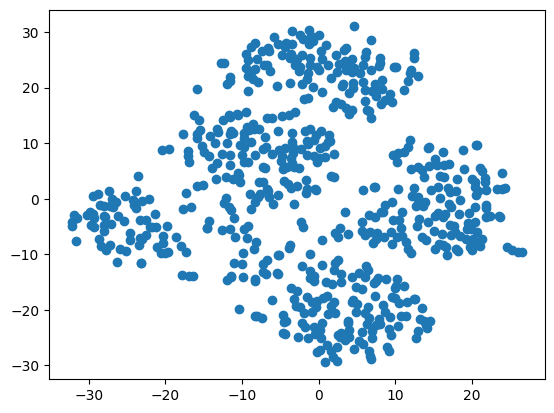

In [49]:
# Create a scatter plot of the t-SNE output
import matplotlib.pyplot as plt

plt.scatter(tsne_components[:,0], tsne_components[:,1])
plt.show()

From the scatter plot above, it seems like there are 5 distinct places where the plots are scattered.

#### Part 3: Perform a Cluster Analysis with K-means

c:\Users\16308\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\16308\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\16308\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\16308\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

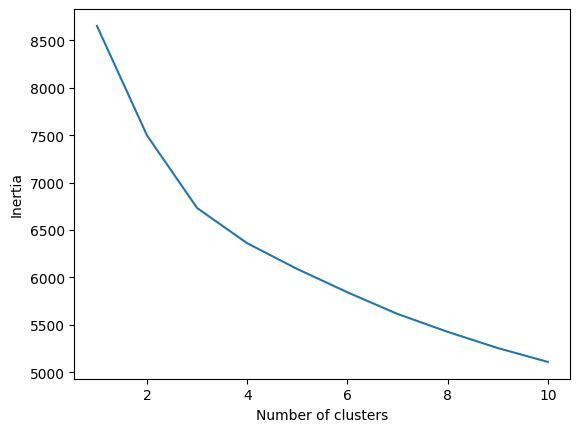

In [50]:
# Performing a Cluster Analysis with K-means
from sklearn.cluster import KMeans
import numpy as np

inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(myopia_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Part 4: Making a Recommendation

Based on the findings from the plot, it looks like the best number of clusters for this data is around 5 clusters, but the optimal number from k-means seems to be 3. Therefore, it is recommended to use 3 clusters in the K-means algorithm to group the patients into distinct clusters.